### Business Problem

In this project, students are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains many departments, and participants must project the sales for each department in each store. To add to the challenge, selected holiday markdown events are included in the dataset. These markdowns are known to affect sales, but it is challenging to predict which departments are affected and the extent of the impact.

You may only use the provided data to make your predictions.

### Data

You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

The basic idea of analyzing the Walmart Forecasting dataset is to get a fair idea about the factors affecting the Sales of the Walmart Store.

### Problem Statemtent

<b> By using these data we have to Predict the walmart sales forecasting based on different parameters</b>

### Data Description

stores.csv

    This file contains anonymized information about the 45 stores, indicating the type and size of store.

train.csv

    This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

    Store - the store number
    Dept - the department number
    Date - the week
    Weekly_Sales -  sales for the given department in the given store
    IsHoliday - whether the week is a special holiday week
    test.csv

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

features.csv

    This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

    Store - the store number
    Date - the week
    Temperature - average temperature in the region
    Fuel_Price - cost of fuel in the region
    MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
    CPI - the consumer price index
    Unemployment - the unemployment rate
    IsHoliday - whether the week is a special holiday week

For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Business objectives and constraints

1. The cost of a mis-classification can be very high.
2. There is some latency concerns.



```
# This is formatted as code
```

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings

### Mounting with GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading the Data From the CSV file

In [ ]:
y=pd.read_excel("/content/Internship_data.xlsx",0)

In [ ]:
y.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [ ]:
y.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft'],
      dtype='object')

In [ ]:
y.shape

(377719, 7)

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


In [ ]:
y.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,377719,377719,377719.0,377719,377719,377719.00,377719
unique,377719,39736,39662.0,27669,26487,48044.00,24010
top,2019-08-17 15:40:00,Not Connect,0.0,Not Connect,Not Connect,28.88,Not Connect
freq,1,723,14226.0,723,723,2036.00,723
first,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-08-07 12:15:00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y.isnull()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
377714,False,False,False,False,False,False,False
377715,False,False,False,False,False,False,False
377716,False,False,False,False,False,False,False
377717,False,False,False,False,False,False,False


In [ ]:
y.isnull().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

In [ ]:
y.isnull().sum()

time                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

In [ ]:
labels = y["Cyclone_Inlet_Gas_Temp"].value_counts()[:10].index
values = y["Cyclone_Inlet_Gas_Temp"].value_counts()[:10].values

colors=y["Cyclone_Inlet_Gas_Temp"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
labels = y["Cyclone_Material_Temp"].value_counts()[:10].index
values = y["Cyclone_Material_Temp"].value_counts()[:10].values

colors=y["Cyclone_Material_Temp"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
labels = y["Cyclone_Outlet_Gas_draft"].value_counts()[:10].index
values = y["Cyclone_Outlet_Gas_draft"].value_counts()[:10].values

colors=y["Cyclone_Outlet_Gas_draft"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
labels = y["Cyclone_cone_draft"].value_counts()[:10].index
values = y["Cyclone_cone_draft"].value_counts()[:10].values

colors=y["Cyclone_cone_draft"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
labels = y["Cyclone_Gas_Outlet_Temp"].value_counts()[:10].index
values = y["Cyclone_Gas_Outlet_Temp"].value_counts()[:10].values

colors=y["Cyclone_Gas_Outlet_Temp"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

In [ ]:
labels = y["Cyclone_Inlet_Draft"].value_counts()[:10].index
values = y["Cyclone_Inlet_Draft"].value_counts()[:10].values

colors=y["Cyclone_Inlet_Draft"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

In [ ]:
labels = y["time"].value_counts()[:10].index
values = y["time"].value_counts()[:10].values

colors=y["time"]

fig = go.Figure(data=[go.Pie(labels = labels, values=values, textinfo="label+percent", marker=dict(colors=colors))])

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Getting the info
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


Visualizing the top 10 store in the train dataset along with their percentage

In [ ]:
y.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [ ]:
indexNames = y[ (y['time'] == 'I/O Timeout') & (y['Cyclone_Inlet_Gas_Temp'] == 'I/O Timeout')&(y['Cyclone_Material_Temp'] == 'I/O Timeout') & (y['Cyclone_Outlet_Gas_draft'] == 'I/O Timeout') & (y['Cyclone_cone_draft'] == 'I/O Timeout') & (y['Cyclone_Gas_Outlet_Temp'] == 'I/O Timeout') &(y['Cyclone_Inlet_Draft'] == 'I/O Timeout') 
 &(y['time'] == 'Not Connect')& (y['Cyclone_Inlet_Gas_Temp'] == 'Not Connect')&(y['Cyclone_Material_Temp'] == 'Not Connect') & (y['Cyclone_Outlet_Gas_draft'] == 'Not Connect') & (y['Cyclone_cone_draft'] == 'Not Connect') & (y['Cyclone_Gas_Outlet_Temp'] == 'Not Connect') &(y['Cyclone_Inlet_Draft'] == 'Not Connect')
 & (y['time'] == 'Unit Down')& (y['Cyclone_Inlet_Gas_Temp'] == 'Unit Down')&(y['Cyclone_Material_Temp'] == 'Unit Down') & (y['Cyclone_Outlet_Gas_draft'] == 'Unit Down') & (y['Cyclone_cone_draft'] == 'Unit Down') & (y['Cyclone_Gas_Outlet_Temp'] == 'Unit Down') &(y['Cyclone_Inlet_Draft'] == 'Unit Down')].index

y.drop(indexNames , inplace=True)

In [ ]:
def scatter(y, column):
    plt.figure()
    plt.scatter(y[column] , y['time'])
    plt.ylabel('time')
    plt.xlabel(column)

ValueError: ignored

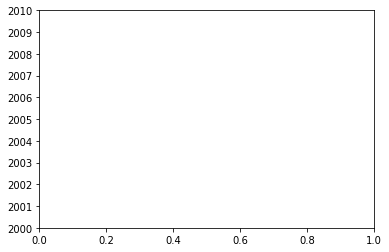

In [ ]:
scatter(y, 'Cyclone_Inlet_Gas_Temp')  # with respect to Fuel_Price
scatter(y, 'Cyclone_Material_Temp')  # with respect to Size
scatter(y, 'Cyclone_Outlet_Gas_draft')  # with respect to CPI
scatter(y, 'Cyclone_cone_draft')  # with respect to Type
scatter(y, 'Cyclone_Gas_Outlet_Temp') # with respect to IsHoliday
scatter(y, 'Cyclone_Inlet_Draft')  # with respect to Unemployment


In [ ]:
# Plotting for the Top Restuarant in the Bengaluru

plt.figure(figsize=(12,8))
val = y['time'].value_counts()[:25]  # Considering for the top 25 restaurants
sns.barplot(x=val, y=val.index, palette = "Set1")
plt.title("Famous Restaurants in the City of Bengaluru")
plt.xlabel("Number of Outlets")

In [ ]:

rel_type = pd.crosstab(y['time'], y['Cyclone_Inlet_Gas_Temp'])
rel_type.plot(kind='bar', stacked=True, figsize=(20,16))
plt.title('City - Rating',fontsize=18)
plt.ylabel('City',fontsize=12)
plt.xlabel('Rating',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

### Correlation Matrix

Let's have a look at the Average Weekly Sales per Year and find out if there is any other holiday peak sales that were not considered by 'IsHoliday' filed

In [ ]:
# Average Weekly Sales for the year 2010
weekly_sales_2010 = y[y['time']==2010]['Weekly_Sales'].groupby(train_merge['Week']).mean()

sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values) # for plotting then lineplot

In [ ]:
# Average Weekly Sales for the year 2011
weekly_sales_2011 = train_merge[train_merge['Year']==2011]['Weekly_Sales'].groupby(train_merge['Week']).mean()

sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values) # for plotting then lineplot

In [ ]:
# Average Weekly Sales for the year 2012
weekly_sales_2012 = train_merge[train_merge['Year']==2012]['Weekly_Sales'].groupby(train_merge['Week']).mean()

sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values) # for plotting then lineplot

In [ ]:
# Plotting the above three plot together 
plt.figure(figsize=(20,8))
sns.lineplot(weekly_sales_2010.index, weekly_sales_2010.values)
sns.lineplot(weekly_sales_2011.index, weekly_sales_2011.values)
sns.lineplot(weekly_sales_2012.index, weekly_sales_2012.values)
plt.grid()
plt.xticks(np.arange(1,60, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales Per Year', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

In [ ]:
# Average Sales per Department

weekly_sales = train_merge['Weekly_Sales'].groupby(train_merge['Dept']).mean()
plt.figure(figsize=(25,12))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per Department', fontsize=20)
plt.xlabel('Department', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

In [ ]:
# Average Sales per Store

weekly_sales = train_merge['Weekly_Sales'].groupby(train_merge['Store']).mean()
plt.figure(figsize=(20,12))
sns.barplot(weekly_sales.index, weekly_sales.values, palette='dark')
plt.grid()
plt.title('Average Sales per Store', fontsize=20)
plt.xlabel('Store', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

In [ ]:
sns.set(style = "white")

corr = train_merge.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [ ]:
# Dropping down the variables that have weak correlation

train_merge = train_merge.drop(columns=['Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])
test_merge = test_merge.drop(columns=['Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

In [ ]:
train_merge.head()

In [ ]:
test_merge.head()

In [ ]:
# Counting the number of unique values
train_df['Dept'].nunique()

In [ ]:
# Counting the number of unique values
train_df['Store'].nunique()

In [ ]:
# Getting the columns in the train_merge 
train_merge.columns

In [ ]:
# Getting the columns in test_merge
test_merge.columns

### Dividing the data into Train and Test

In [ ]:
X = train_merge[['Store','Dept','IsHoliday','Size','Week','Year']] # Selecting the values to be taken in the X
y = train_merge['Weekly_Sales'] 

# Model Building

In [ ]:
# Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
X_train.info()

In [ ]:
# Performing GridSearchCV on Ridge Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params, cv = 7, scoring = 'neg_mean_absolute_error', n_jobs = -1)
ridge_regressor.fit(X_train, y_train)

In [ ]:
# Predicting train and test results
y_train_pred = ridge_regressor.predict(X_train)
y_test_pred = ridge_regressor.predict(X_test)

In [ ]:
print("Train Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

In [ ]:
print("Test Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test.values, y_test_pred)))
print("R-Squared: ", r2_score(y_test.values, y_test_pred))

In [ ]:
# Performing GridSearchCV on Lasso Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor = GridSearchCV(Lasso(), params ,cv = 15,scoring = 'neg_mean_absolute_error', n_jobs = -1)
lasso_regressor.fit(X_train, y_train)

In [ ]:
# Predicting train and test results
y_train_pred = lasso_regressor.predict(X_train)
y_test_pred = lasso_regressor.predict(X_test)

In [ ]:
print("Train Results for Lasso Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

In [ ]:
print("Test Results for Lasso Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

In [ ]:
# Performing GridSearchCV on Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(X_train,y_train)

In [ ]:
# Predicting train and test results
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [ ]:
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

In [ ]:
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

In [ ]:
# Performing RandomsearchCV on Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
tuned_params = {'n_estimators': [100, 200], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}  
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 3, scoring = 'neg_mean_absolute_error', cv = 3, n_jobs = -1)
random_regressor.fit(X_train, y_train)

In [ ]:
# Predicting train and test results
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [ ]:
print("Train Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

In [ ]:
print("Test Results for Random Forest Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

**Conclusion**
With the above implementation it was possible to forecast the prediction for the Walmart Stores